<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Setup</h1>
</div> 

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Imports</h2>
</div>

In [49]:
# Standard Library 
import pickle

# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    OneHotEncoder, 
    OrdinalEncoder, 
    PolynomialFeatures
)
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform  # for random hyperparameter values

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb

# Model Evaluation: Regression
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_percentage_error, 
    r2_score
)

# Statistical Analysis
from scipy.stats import ttest_ind

# Model Evaluation: Classification
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    precision_recall_curve,
    auc,
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay
)

# Set visualization style 
sns.set_theme(style="whitegrid")

plt.rcParams.update({
    "figure.facecolor": "#f2f2f2",
    "axes.facecolor": "#f2f2f2",

    "axes.grid": True,
    "axes.grid.axis": "y",   
    "grid.linestyle": "--",
    "grid.alpha": 0.8,

    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": True,
    "axes.spines.bottom": True,
})
# To show all columns
pd.set_option('display.max_columns', 15)

# My custom functions
from utils import *

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">CSV</h2>
</div>  

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Load data from a <code>.csv</code> file into a Pandas DataFrame.
</div>

In [50]:
try:
    df = pd.read_csv("data/train.csv")
    print("Train Data loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: The file content could not be parsed as a CSV.")
except PermissionError:
    print("Error: Permission denied when accessing the file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Train Data loaded successfully.


<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Initial Data Inspection</h2>
</div> 

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Basic exploration of the dataset to understand its structure and detect obvious issues.
</div>

In [51]:
# Show DataFrame info to check the number of rows and columns, data types and missing values
print(f"Informations About The Dataset :\n")
print(df.info())

Informations About The Dataset :

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-

In [52]:
# Show top five rows of the data
df.head().style.set_properties(**{
    'background-color': '#f8f9fa',
    'color': 'black',
    'border': '1px solid #dee2e6'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4e79a7'), ('color', 'white')]}
])

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.600000,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.000000,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.000000,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.000000,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.800000,2,3,3,Presence


<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Data Preprocessing</h1>
</div> 

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Standardizing Names and Labels</h2>
</div>

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    <strong>Column Names</strong> <br>
    📌 Convert all column names to snake_case for consistency, improved readability, and to minimize the risk of errors.
</div>

In [53]:
# Convert column names to snake_case
df.columns = (
    df.columns
    .str.strip()  # Remove leading/trailing spaces
    .str.lower()  # Convert to lowercase
    .str.replace(r"[-/\s+]", "_", regex=True)  # Replace spaces and special characters with "_"
)
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   age                      630000 non-null  int64  
 2   sex                      630000 non-null  int64  
 3   chest_pain_type          630000 non-null  int64  
 4   bp                       630000 non-null  int64  
 5   cholesterol              630000 non-null  int64  
 6   fbs_over_120             630000 non-null  int64  
 7   ekg_results              630000 non-null  int64  
 8   max_hr                   630000 non-null  int64  
 9   exercise_angina          630000 non-null  int64  
 10  st_depression            630000 non-null  float64
 11  slope_of_st              630000 non-null  int64  
 12  number_of_vessels_fluro  630000 non-null  int64  
 13  thallium                 630000 non-null  int64  
 14  heart_disease  

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    <strong>Categorical Labels</strong> <br>
    📌 Convert all categorical labels to snake_case for consistency, improved readability, and to minimize the risk of errors.
</div>

In [54]:
def standardize_categorical_labels(categorical_label):
    return (
        categorical_label
        .strip()  # Remove leading/trailing spaces
        .lower()  # Convert to lowercase
        .replace("-", "_")  # Replace hyphens with "_"
        .replace("/", "_")  # Replace slashes with "_"
        .replace(" ", "_")  # Replace spaces with "_"
    )


# Define categorical columns to standardize labels
columns_to_standardize = ["heart_disease"]

# Apply standardization of categorical labels
for column in columns_to_standardize:
    df[column] = df[column].apply(standardize_categorical_labels)


<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Handling Duplicates</h2>
</div>

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Identify duplicates based on:
<ul>
    <li><strong>All columns</strong>: To detect exactly identical rows.</li>
    <li><strong>ID column only</strong>: To ensure that no two rows share the same ID.</li>
    <li><strong>All columns except ID</strong>: To catch "hidden" duplicates where the same sample may have been recorded twice under different IDs.</li>
</ul>
</div>

In [55]:
# Identify duplicates based on all columns
df.duplicated().value_counts()

False    630000
Name: count, dtype: int64

In [56]:
# Remove duplicates
df = df.drop_duplicates(["id"]).copy()

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Identify and remove duplicates based on all columns except the ID column.
</div>

In [57]:
# Identify duplicates based on all columns except ID 
df.duplicated(subset=df.columns.drop("id"), keep=False).value_counts()

False    630000
Name: count, dtype: int64

In [58]:
# Remove duplicates
df = df.drop_duplicates(subset=df.columns.difference(['id'])).copy()

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Handling Data Types</h2>
</div>

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Identify and convert incorrect storage data types.
</div>

In [59]:
# 1. Data Types
print(f"{' DATA TYPES ':=^50}")
print(df.dtypes)

# 2. Numerical Descriptive
print(f"\n{' NUMERICAL DESCRIPTIVE ':=^50}")
print(df.describe().loc[['min', 'max']].T.round(2)) 

# 3. Categorical Unique
print(f"\n{' CATEGORICAL UNIQUE VALUES ':=^50}")
for col in df.select_dtypes(include="object").columns:
    print(f"Variable: {col:20} | Uniques: {df[col].nunique()}")
    print(f"Values  : {df[col].unique()}\n")
print("="*50)

=================== DATA TYPES ===================
id                           int64
age                          int64
sex                          int64
chest_pain_type              int64
bp                           int64
cholesterol                  int64
fbs_over_120                 int64
ekg_results                  int64
max_hr                       int64
exercise_angina              int64
st_depression              float64
slope_of_st                  int64
number_of_vessels_fluro      int64
thallium                     int64
heart_disease                  str
dtype: object

============= NUMERICAL DESCRIPTIVE ==============
                           min       max
id                         0.0  629999.0
age                       29.0      77.0
sex                        0.0       1.0
chest_pain_type            1.0       4.0
bp                        94.0     200.0
cholesterol              126.0     564.0
fbs_over_120               0.0       1.0
ekg_results                0.0

C:\Users\jeroh\AppData\Local\Temp\ipykernel_78528\4181410217.py:11: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  for col in df.select_dtypes(include="object").columns:


In [60]:
# Convert column from object to boolean
df["sex"] = df["sex"].astype(str)
df["chest_pain_type"] = df["chest_pain_type"].astype(str)
df["fbs_over_120"] = df["fbs_over_120"].astype(str)
df["ekg_results"] = df["ekg_results"].astype(str)
df["exercise_angina"] = df["exercise_angina"].astype(str)
df["slope_of_st"] = df["slope_of_st"].astype(str)
df["number_of_vessels_fluro"] = df["number_of_vessels_fluro"].astype(str)
df["thallium"] = df["thallium"].astype(str)

df.head()

,id,age,sex,chest_pain_type,bp,cholesterol,fbs_over_120,ekg_results,max_hr,exercise_angina,st_depression,slope_of_st,number_of_vessels_fluro,thallium,heart_disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,presence


In [61]:
df = df.drop(columns=["id"]).copy()

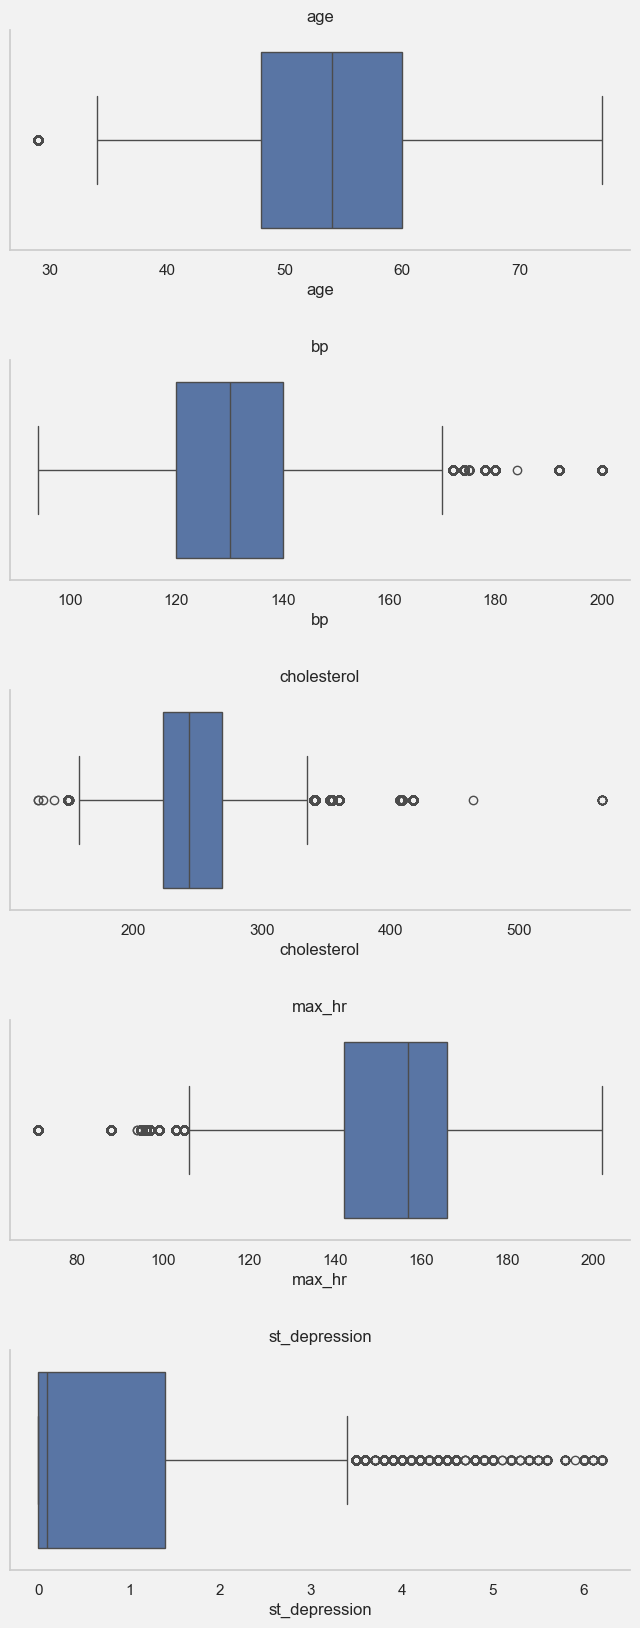

In [62]:
cols_num = df.select_dtypes(include="number").columns.tolist()

fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8, 4*len(cols_num)))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title(col)

<div style="padding:15px; border:3px solid #3d7ab3; border-radius:6px;">
    📌 Semantic types
</div>

In [63]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

cat_like_columns = df.select_dtypes(include=["object", "string", "category"]).columns.tolist()

binary_columns = [col for col in df.columns if df[col].nunique() == 2]

categorical_columns = [col for col in cat_like_columns if df[col].nunique() > 2]

<div style="background-color:#2c699d; color:white; padding:15px; border-radius:6px;">
    <h1 style="margin:0px">Exploratory Data Analysis (EDA)</h1>
</div>

In [64]:
df[numerical_columns].describe().T.style.set_properties(**{
    'background-color': '#f8f9fa',
    'color': 'black',
    'border': '1px solid #dee2e6'
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4e79a7'), ('color', 'white')]}
])

,count,mean,std,min,25%,50%,75%,max
age,630000.000000,54.136706,8.256301,29.000000,48.000000,54.000000,60.000000,77.000000
bp,630000.000000,130.497433,14.975802,94.000000,120.000000,130.000000,140.000000,200.000000
cholesterol,630000.000000,245.011814,33.681581,126.000000,223.000000,243.000000,269.000000,564.000000
max_hr,630000.000000,152.816763,19.112927,71.000000,142.000000,157.000000,166.000000,202.000000
st_depression,630000.000000,0.716028,0.948472,0.000000,0.000000,0.100000,1.400000,6.200000


Figure saved to 'images\numerical_distributions.png'.


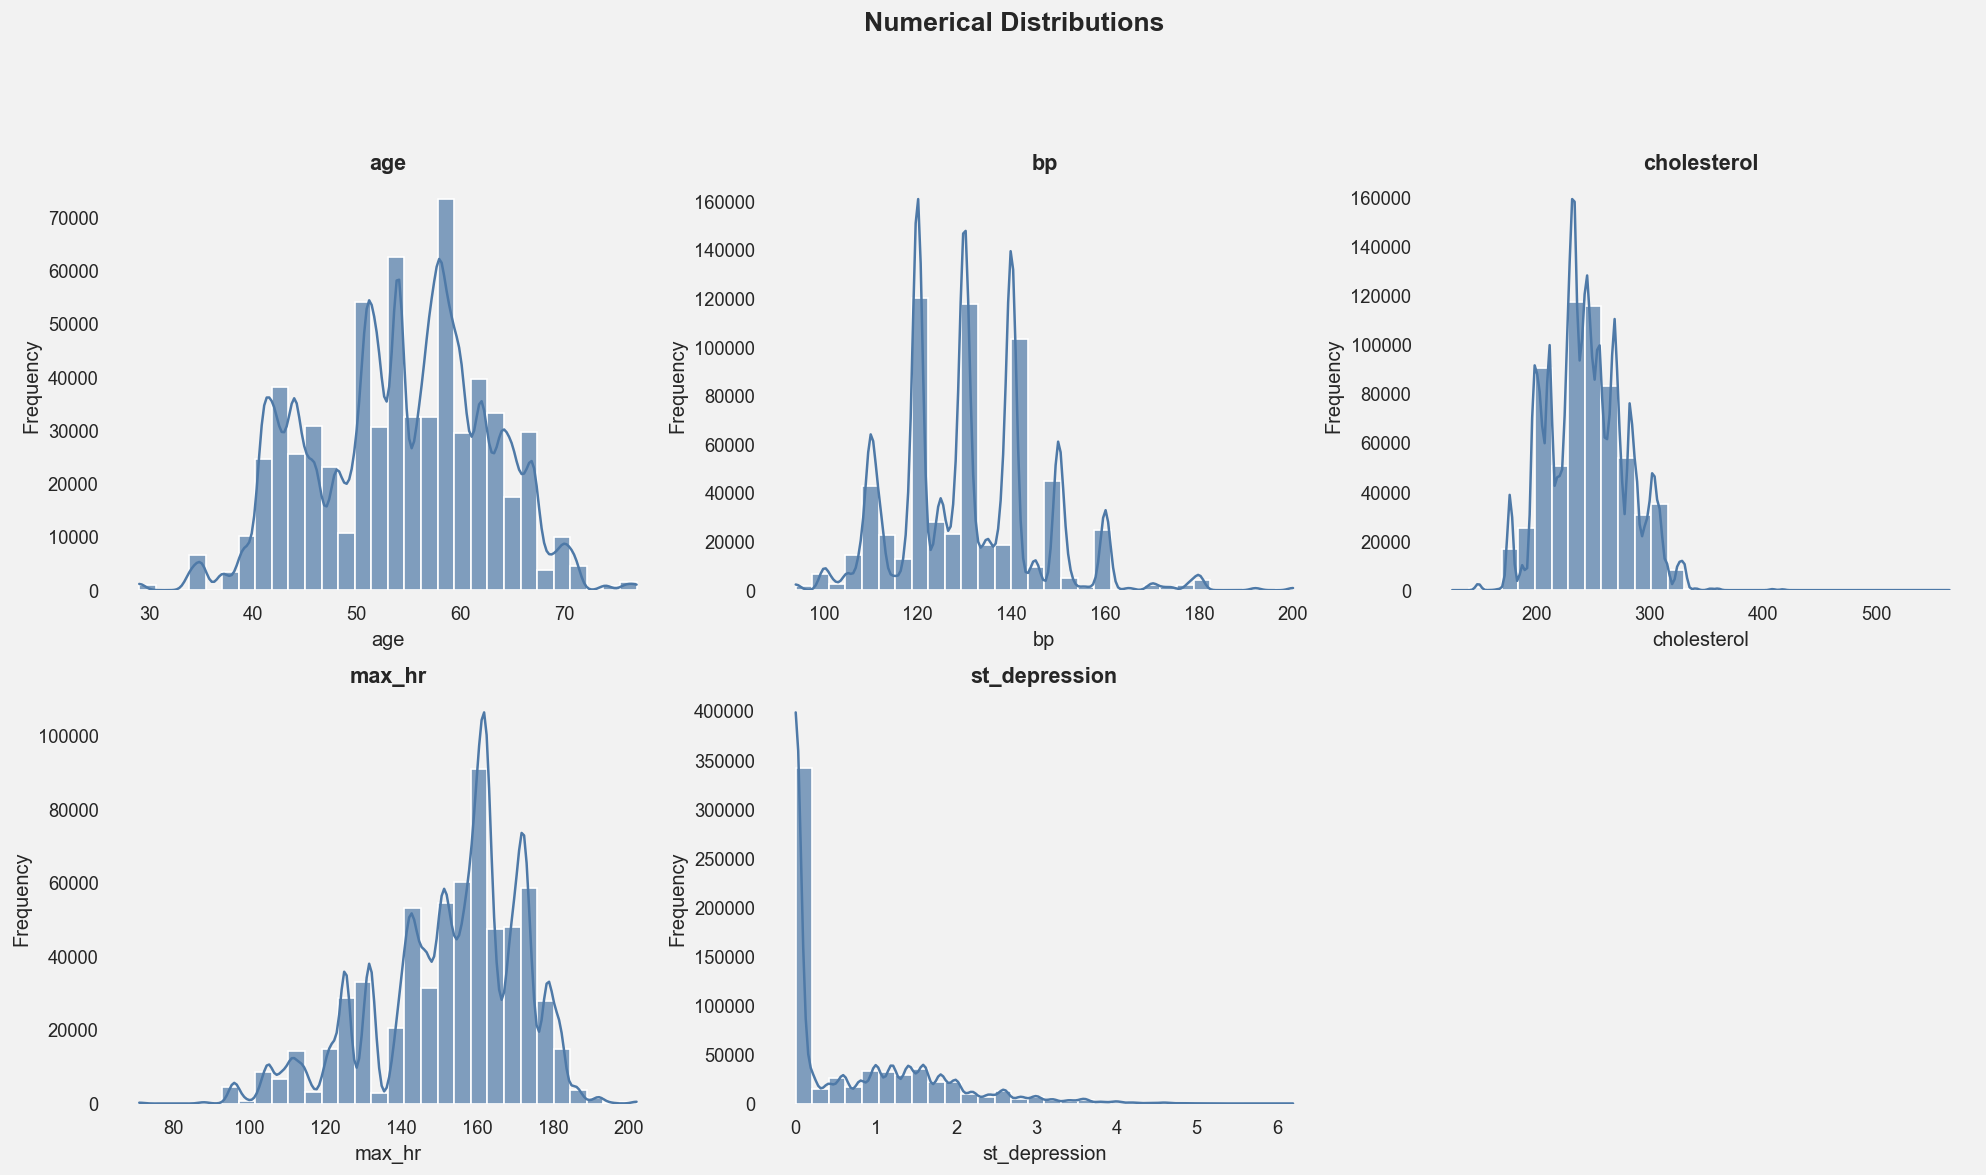

In [65]:
numerical_distributions = plot_numerical_distributions(df, numerical_columns ,n_cols=3,title="Numerical Distributions",figsize=(20, 10))
save_figure(numerical_distributions, "numerical_distributions.png")
plt.show()

Figure saved to 'images\general_binary_distributions.png'.


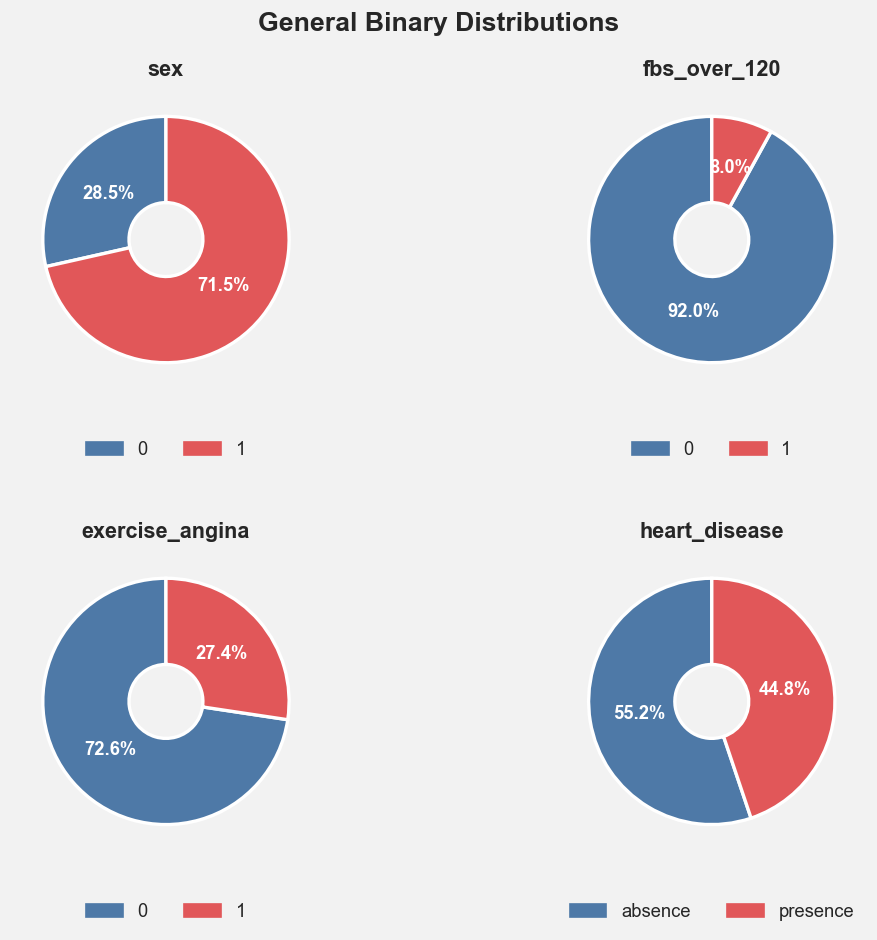

In [66]:
general_binary_distributions = plot_binary_donuts(
    df=df, 
    selected_columns=binary_columns,
    n_cols=2,
    title="General Binary Distributions"
    )

save_figure(general_binary_distributions, "general_binary_distributions.png",dpi=300)

plt.show()

Figure saved to 'images\general_categorical_distributions.png'.


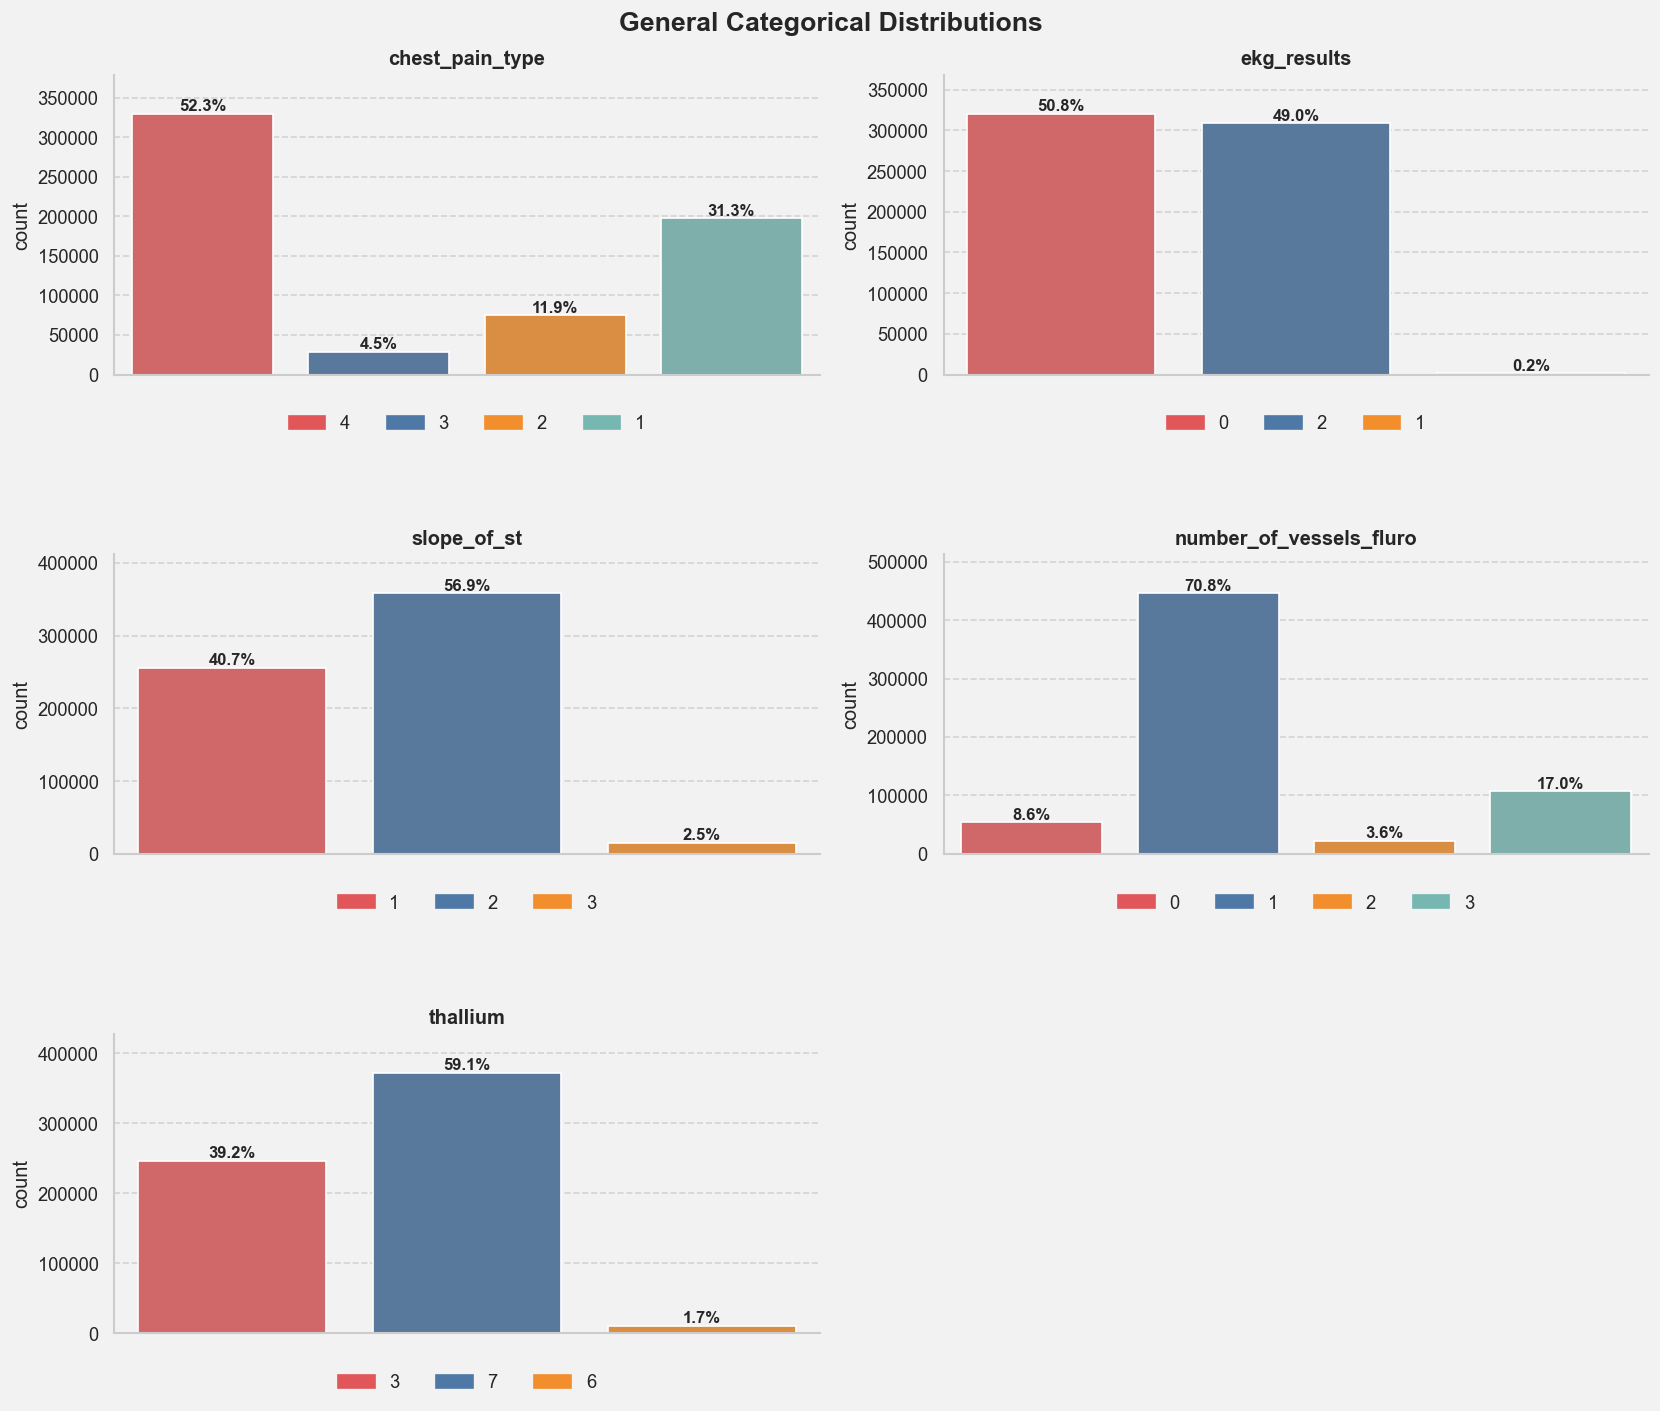

In [67]:
fig = plot_categorical_bar_charts(
    df=df,
    selected_columns=categorical_columns,
    title="General Categorical Distributions"
)

save_figure(fig, "general_categorical_distributions.png")

plt.show()



Figure saved to 'images\correlation_heatmap.png'.


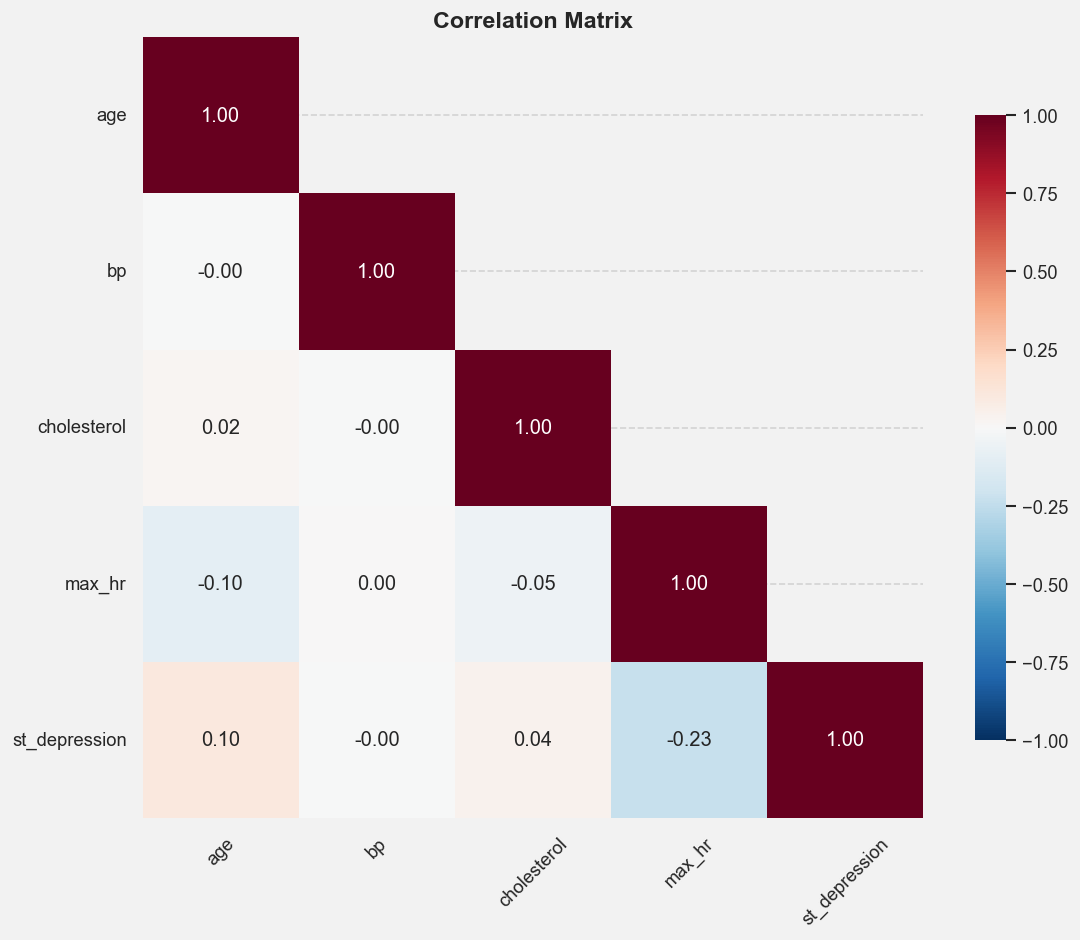

In [68]:
corr_heatmap =plot_correlation_heatmap(df, numerical_columns)
save_figure(corr_heatmap, "correlation_heatmap.png")
plt.show()

In [69]:
df_heart_disease = df[df["heart_disease"] == "presence"]
df_not_heart_disease = df[df["heart_disease"] == "absence"]

Figure saved to 'images\heart_disease_binary_distributions.png'.


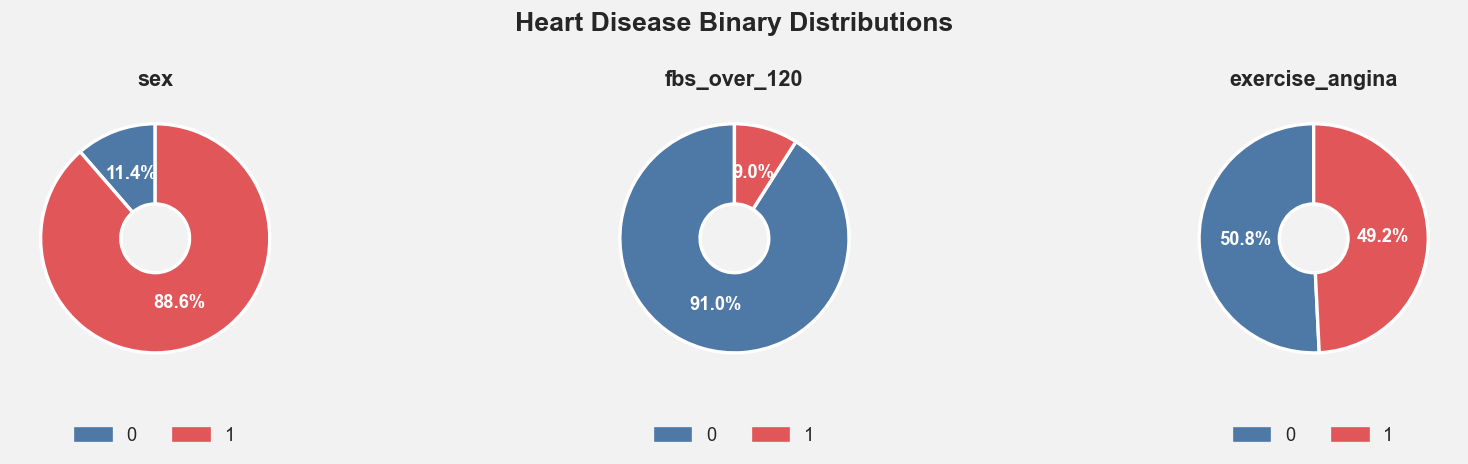

Figure saved to 'images\not_heart_disease_binary_distributions.png'.


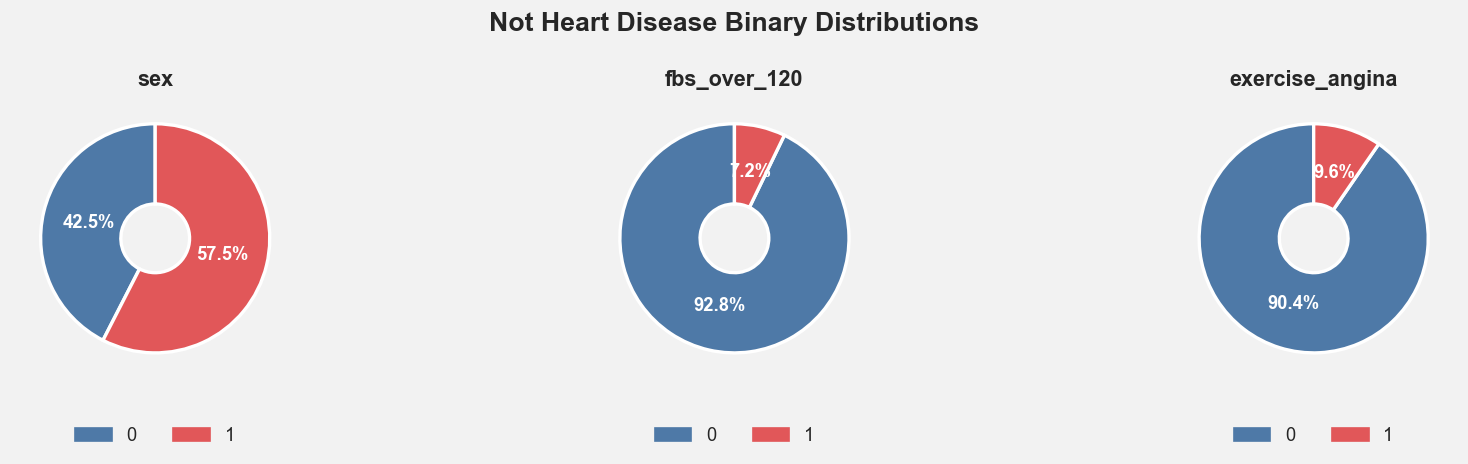

In [72]:
heart_disease_binary_distributions = plot_binary_donuts(
    df=df_heart_disease, 
    selected_columns=['sex', 'fbs_over_120', 'exercise_angina'],
    n_cols=3,
    title="Heart Disease Binary Distributions"
    )

save_figure(heart_disease_binary_distributions, "heart_disease_binary_distributions.png",dpi=300)

plt.show()

not_heart_disease_binary_distributions = plot_binary_donuts(
    df=df_not_heart_disease, 
    selected_columns=['sex', 'fbs_over_120', 'exercise_angina'],
    n_cols=3,
    title="Not Heart Disease Binary Distributions"
    )

save_figure(not_heart_disease_binary_distributions, "not_heart_disease_binary_distributions.png",dpi=300)

plt.show()

Figure saved to 'images\heart_disease_categorical_distributions.png'.


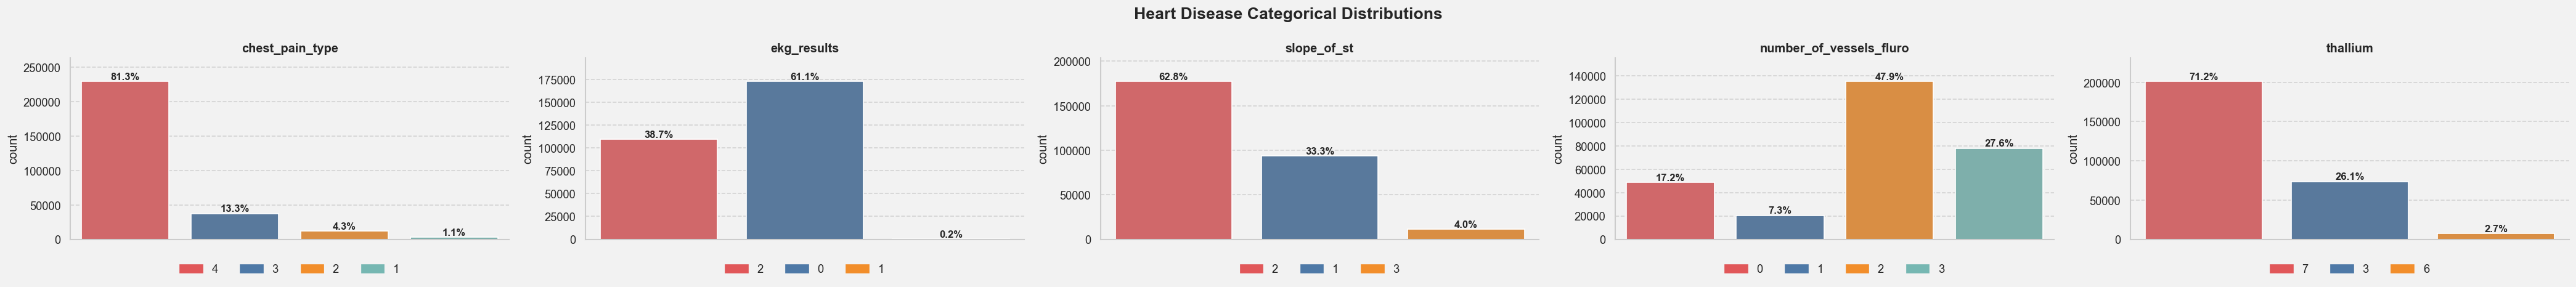

Figure saved to 'images\not_heart_disease_categorical_distributions.png'.


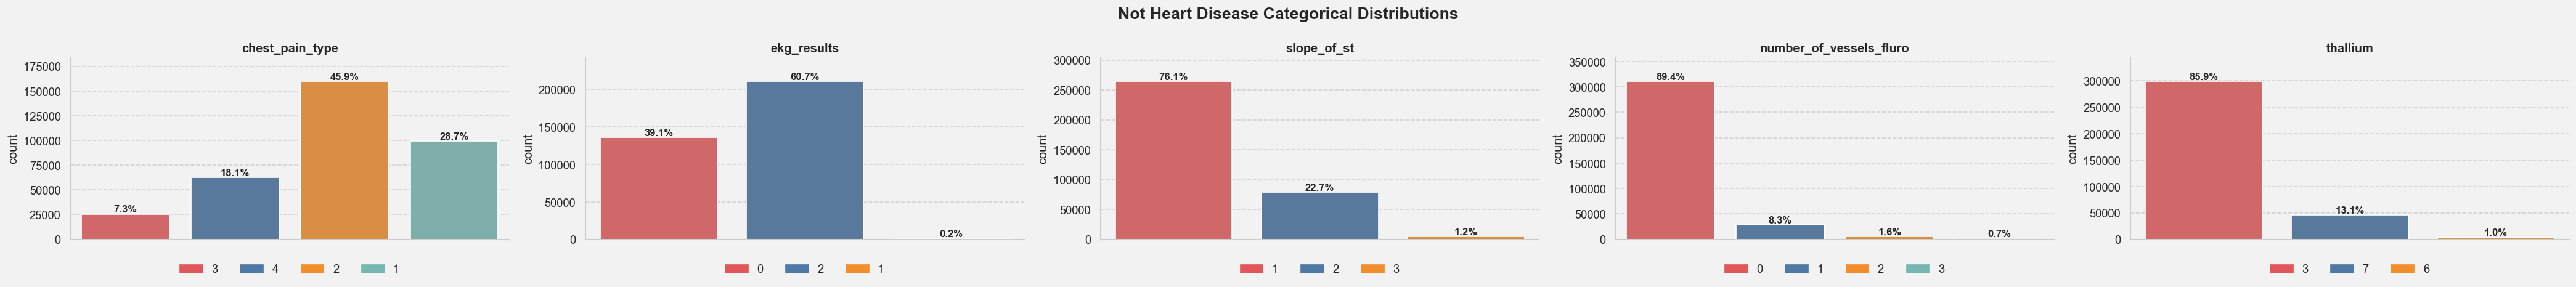

In [75]:
heart_disease_categorical_distributions = plot_categorical_bar_charts(
    df=df_heart_disease,
    n_cols=5,
    selected_columns=categorical_columns,
    title="Heart Disease Categorical Distributions"
)

save_figure(heart_disease_categorical_distributions, "heart_disease_categorical_distributions.png")

plt.show()

not_heart_disease_categorical_distributions = plot_categorical_bar_charts(
    df=df_not_heart_disease,
    n_cols=5,
    selected_columns=categorical_columns,
    title="Not Heart Disease Categorical Distributions"
)

save_figure(not_heart_disease_categorical_distributions, "not_heart_disease_categorical_distributions.png")

plt.show()

Figure saved to 'images\heart_disease_vs_not_heart_disease.png'.


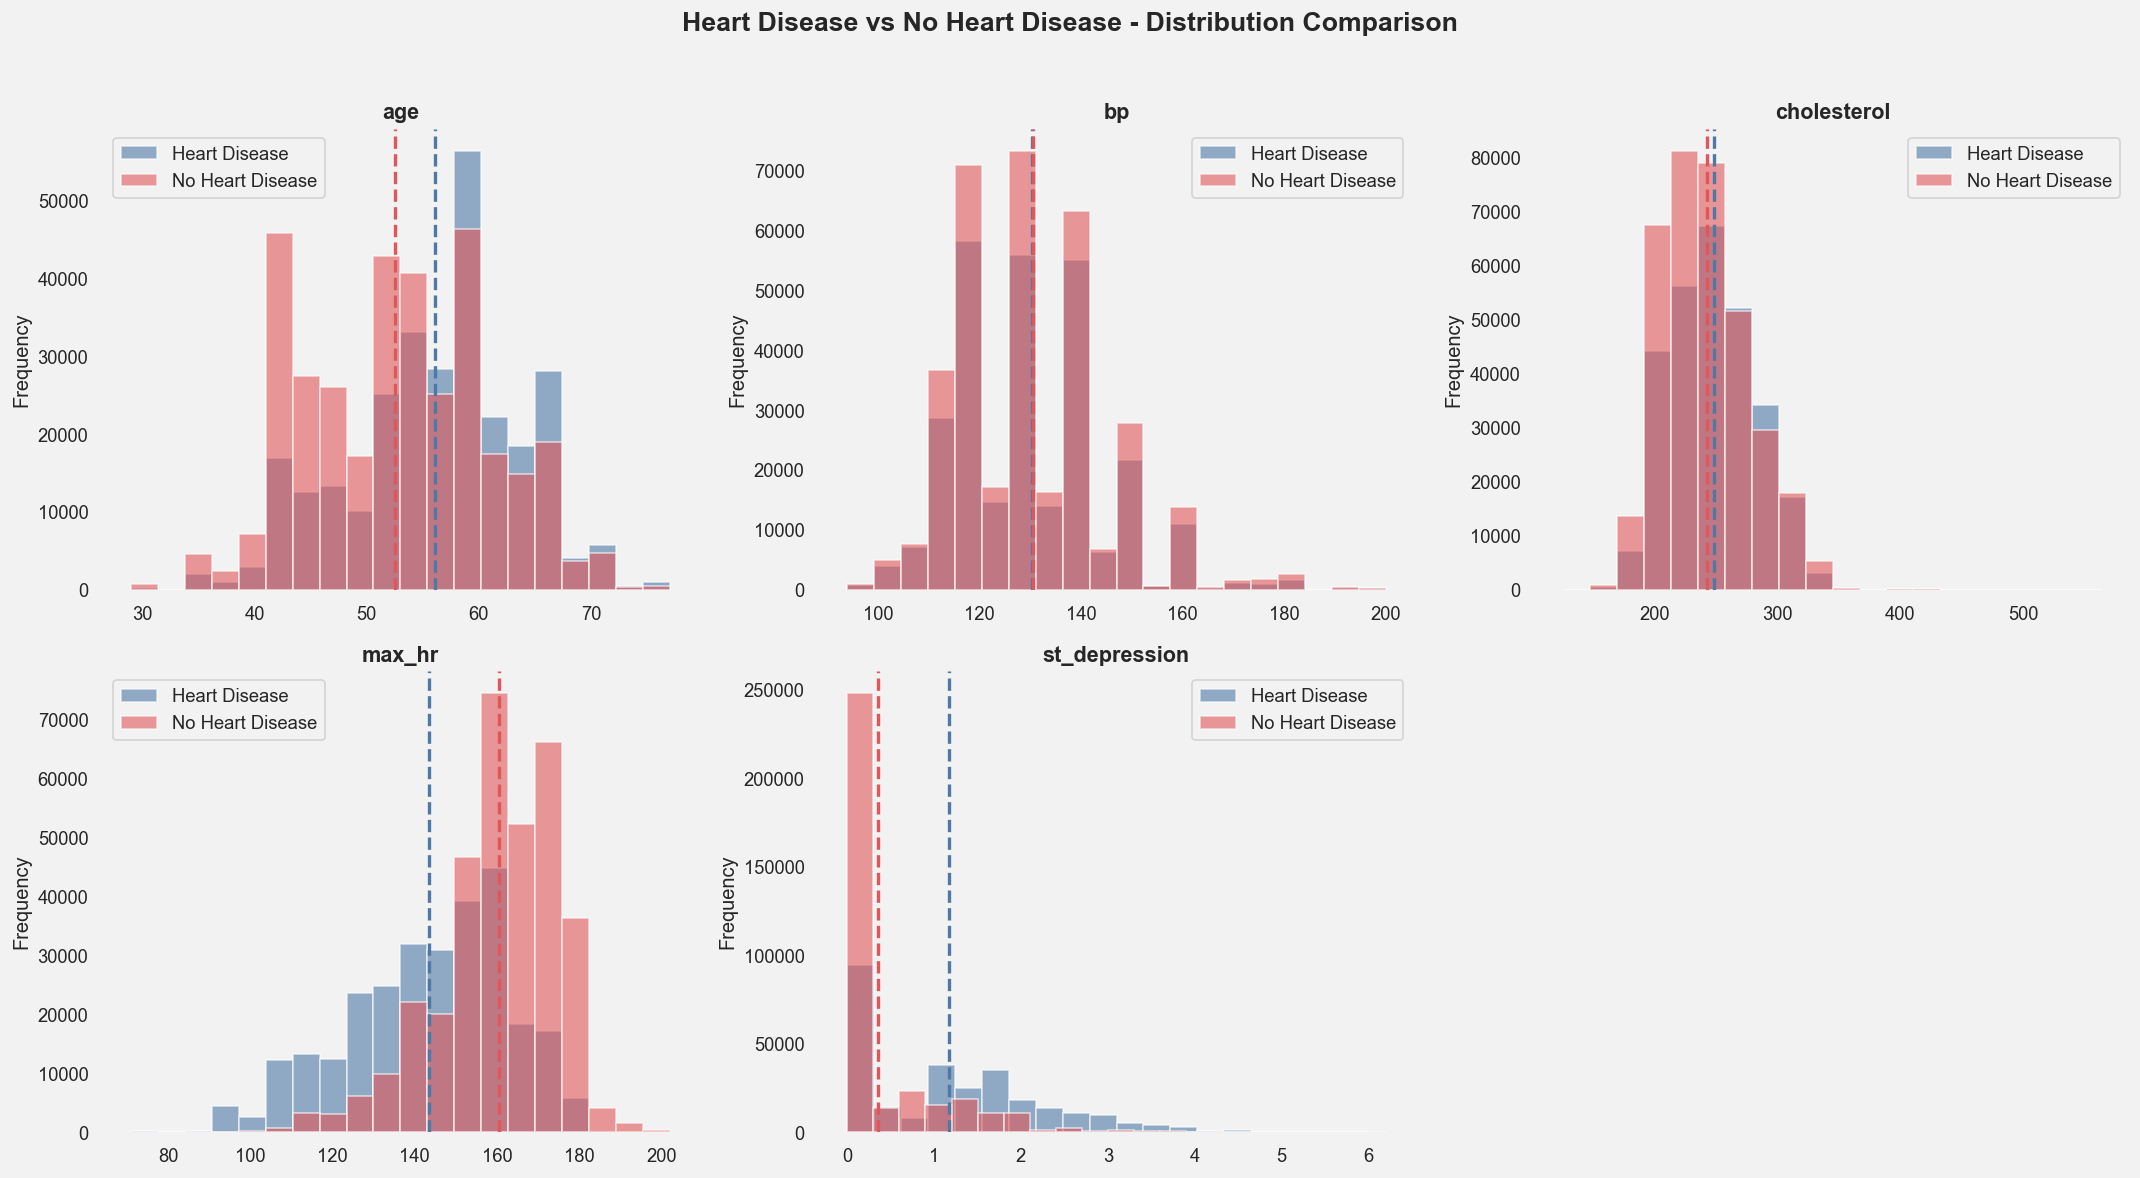

In [ ]:
heart_disease_vs_not_heart_disease = plot_group_distribution_comparison(
    columns=numerical_columns,
    group0=df_heart_disease,
    label0="Heart Disease",
    group1=df_not_heart_disease,
    label1="No Heart Disease",
    n_cols=3,
    title="Heart Disease vs No Heart Disease - Distribution Comparison"
)
save_figure(heart_disease_vs_not_heart_disease, "heart_disease_vs_not_heart_disease.png")

plt.show()

<div style="background-color:#3d7ab3; color:white; padding:12px; border-radius:6px;">
    <h2 style="margin:0px">Statistical Analysis</h2>
</div>

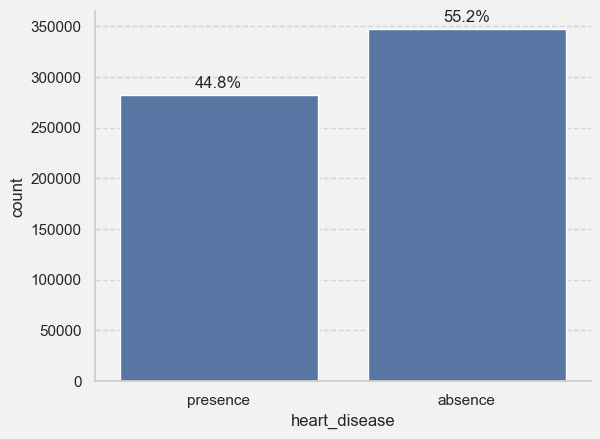

In [ ]:
# count of heart_disease
ax = sns.countplot(x='heart_disease', data=df)

total = len(df)
labels = [f'{(v.get_height()/total)*100:.1f}%' for v in ax.containers[0]]

ax.bar_label(ax.containers[0], labels=labels, padding=3)

plt.show()

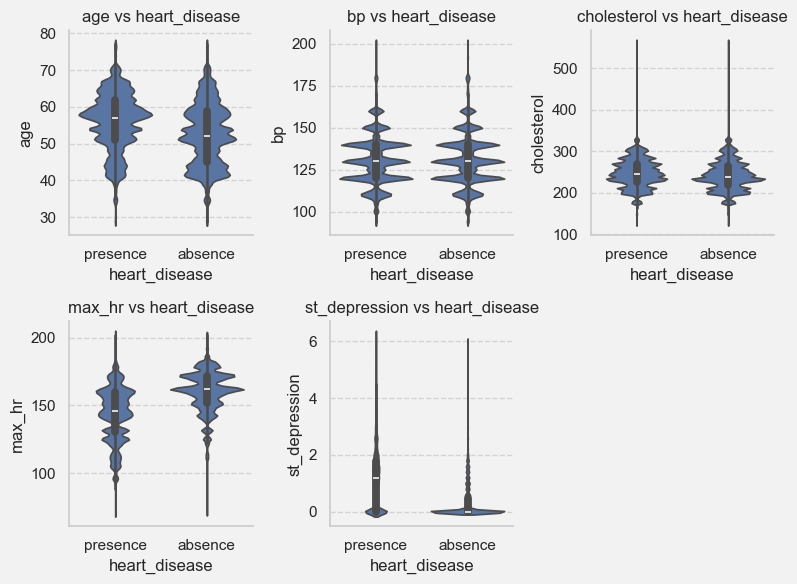

In [ ]:
# Violinplot X (nontinuous numerical columnds) vs Y (heart_disease)
numeric_columns =[x for x in df.columns if df[x].nunique() > 10 and x != "id"]

fig, axes = plt.subplots(2,3, figsize = (8,6))
for i, ax in enumerate(axes.flatten()):

    if i < len(numeric_columns):
        sns.violinplot(x = "heart_disease",data = df, y =numeric_columns[i], ax=ax)
        ax.set_title(f"{numeric_columns[i]} vs heart_disease")
        ax.set_ylabel(numeric_columns[i])
        ax.set_xlabel("heart_disease")
    else:
        ax.set_visible(False)
plt.tight_layout()
plt.show()


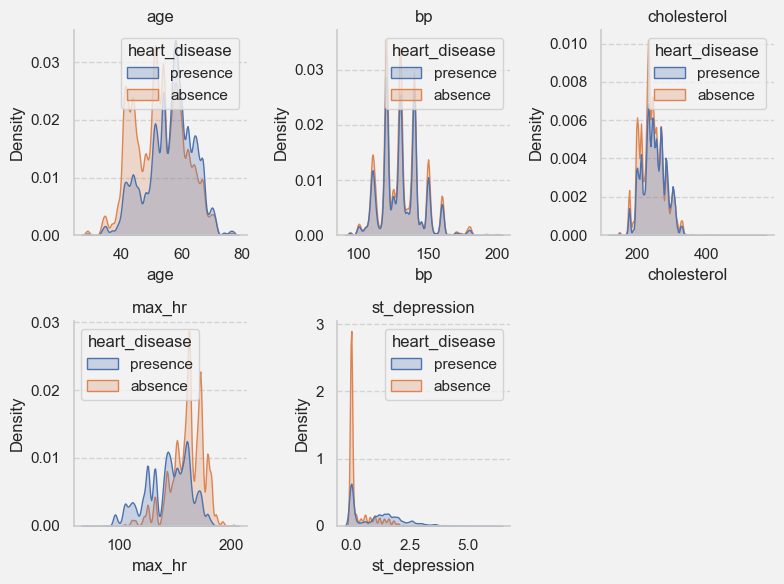

In [ ]:
#KDEplot 

fig, axes = plt.subplots(2,3, figsize = (8,6))
for i, ax in enumerate(axes.flatten()):

    if i < len(numeric_columns):
        sns.kdeplot(data= df, x = numeric_columns[i], hue = "heart_disease", ax= ax, fill = True)
        ax.set_title(numeric_columns[i])
        ax.set_xlabel(numeric_columns[i])
        ax.set_ylabel("Density")
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()


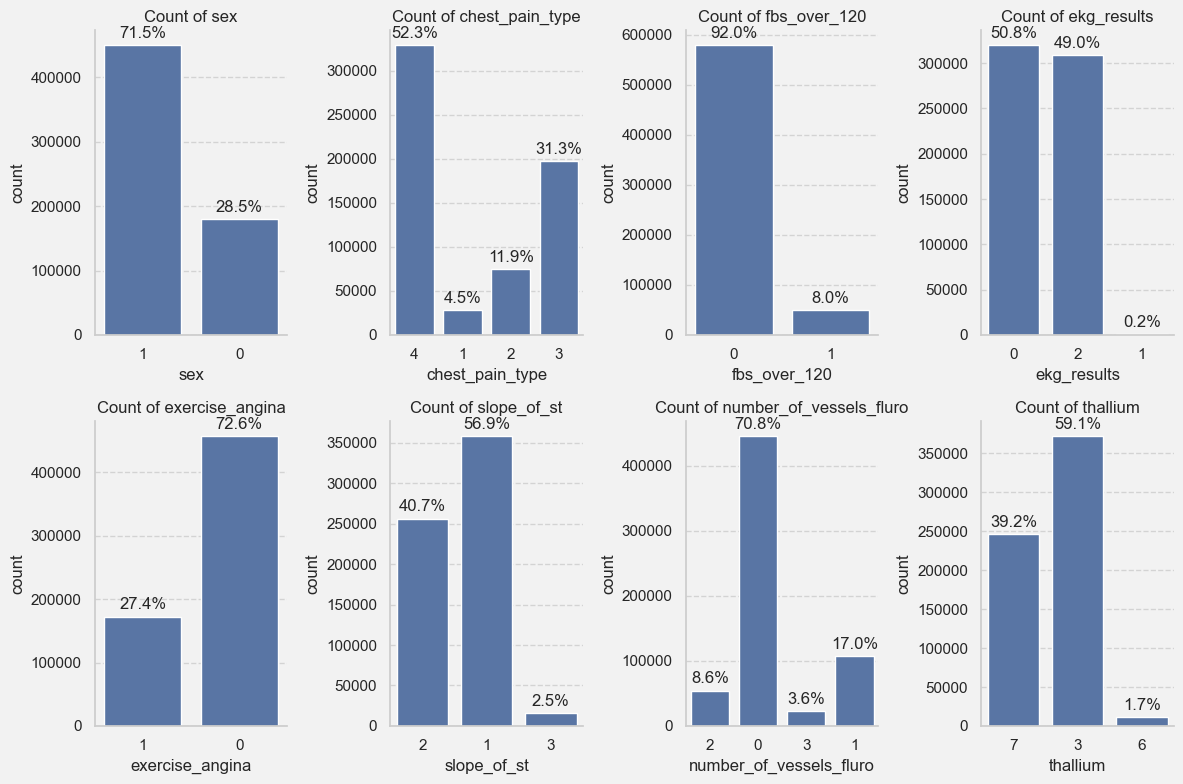

In [ ]:
#Countplot for non-continuos numeric columns
categorical_ordinal_columns = [x for x in df.columns if x not in numeric_columns and x != "id" and x!= "heart_disease"]

fig, axes = plt.subplots(2,4, figsize= (12,8))

for i, ax in enumerate(axes.flatten()):
    
    ax1 = sns.countplot(data = df, x = categorical_ordinal_columns[i], ax= ax)
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in ax1.containers[0]]
    ax1.bar_label(ax1.containers[0], labels = labels, padding = 3)

    ax.set_title(f"Count of {categorical_ordinal_columns[i]}")
    
plt.tight_layout()
plt.show()


    

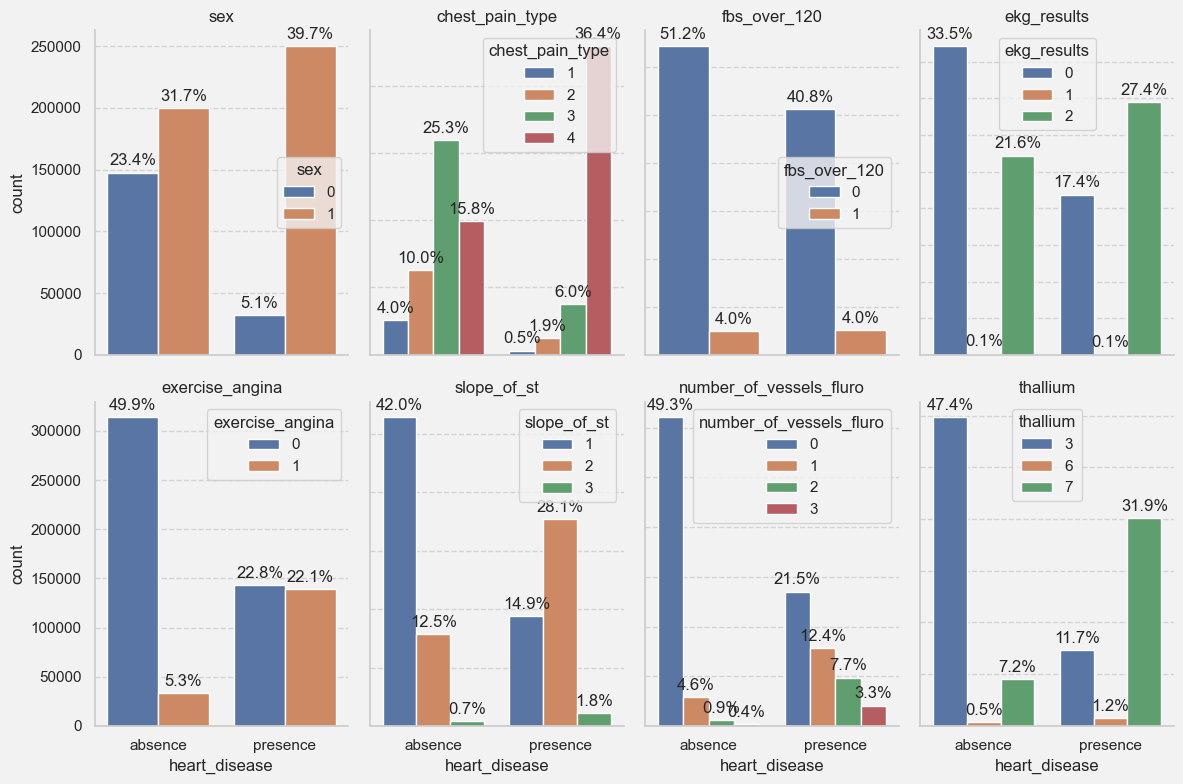

In [ ]:
#gruped barplot for every categorical column

categorical_ordinal_columns = [x for x in df.columns if x not in numeric_columns and x != "id" and x!= "heart_disease"]

fig, axes = plt.subplots(2,4, figsize = (12,8))

for i, ax in enumerate(axes.flatten()):

    grouped = df.groupby(["heart_disease", categorical_ordinal_columns[i]]).agg(
    count = (categorical_ordinal_columns[i], "count")
    )

    ax1 = sns.barplot(x = "heart_disease",
                data = grouped,
                y = "count", 
                hue = categorical_ordinal_columns[i],
                ax=ax)
    for container in ax1.containers:
        labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
        ax.bar_label(container, labels = labels, padding=3)
    ax.set_title(categorical_ordinal_columns[i])
    ax.label_outer()  
plt.tight_layout()
plt.show()
